In [95]:
import pandas as pd
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("./wnba-forecasts/wnba_elo_latest.csv")

In [4]:
df.head()

,season,date,playoff,neutral,status,home_team,away_team,home_team_abbr,away_team_abbr,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,commissioners_cup_final
0,2022,2022-05-06,0,0,post,Washington Mystics,Indiana Fever,WAS,IND,1461.824293,1407.526397,0.684187,0.315813,84,70,1472.094198,1397.256492,0
1,2022,2022-05-06,0,0,post,Chicago Sky,Los Angeles Sparks,CHI,LAS,1578.402735,1469.113599,0.748313,0.251687,91,98,1557.630026,1489.886308,0
2,2022,2022-05-06,0,0,post,Phoenix Mercury,Las Vegas Aces,PHO,LVA,1544.273248,1568.656931,0.579362,0.420638,88,106,1518.415657,1594.514522,0
3,2022,2022-05-06,0,0,post,Seattle Storm,Minnesota Lynx,SEA,MIN,1526.818047,1547.584874,0.584427,0.415573,97,74,1546.891209,1527.511712,0
4,2022,2022-05-07,0,0,post,New York Liberty,Connecticut Sun,NYL,CON,1428.029521,1583.142022,0.393558,0.606442,81,79,1436.758754,1574.412790,0


In [13]:
for column in df.columns: 
    print(column, df[column].nunique())

season 1
date 97
playoff 2
neutral 1
status 1
home_team 12
away_team 12
home_team_abbr 12
away_team_abbr 12
home_team_pregame_rating 240
away_team_pregame_rating 240
home_team_winprob 240
away_team_winprob 240
home_team_score 51
away_team_score 51
home_team_postgame_rating 240
away_team_postgame_rating 240
commissioners_cup_final 2


Using a function, create a new row that tells us if the home team win probability was correct. Run this function using .apply() and a lambda. 

In [73]:
def categorise(row):  
    if row['home_team_winprob'] > row['away_team_winprob']:
        return 'True'
    return 'False'

In [76]:
df['prediction_true'] = df.apply(lambda row: categorise(row), axis=1)

Get only the columns we want to analyze from the dataframe and assign it to the new dataframe called `filtered`

In [78]:
filtered = df[["home_team_abbr", "home_team_score", "home_team_winprob", "away_team_abbr","away_team_score", "away_team_winprob", "prediction_true","date"]].groupby("date").max()

Filter this dataframe further by running a query on `filtered` to get only games where the home team won. Save this to a dataframe called `home_wins`

In [79]:
home_wins = filtered.query('home_team_score > away_team_score')

In [83]:
home_wins.head(30)

,home_team_abbr,home_team_score,home_team_winprob,away_team_abbr,away_team_score,away_team_winprob,prediction_true
date,,,,,,,
2022-05-07,NYL,81,0.686024,CON,79,0.606442,True
2022-05-10,WAS,89,0.462026,MIN,76,0.555983,False
2022-05-11,PHO,97,0.760661,SEA,77,0.487332,True
2022-05-18,SEA,74,0.510792,CHI,71,0.489208,True
2022-05-20,SEA,94,0.859067,WAS,85,0.470000,True
2022-05-21,LVA,100,0.740439,PHO,80,0.388504,True
2022-05-23,LVA,104,0.796326,LAS,76,0.203674,True
2022-05-24,WAS,95,0.859538,NYL,90,0.303004,True
2022-05-25,LAS,99,0.551692,PHO,94,0.448308,True


Create a bar plot using Seaborn to show the average home team score within our dataset of home team wins in the WNBA postseason.

<AxesSubplot:xlabel='home_team_abbr', ylabel='home_team_score'>

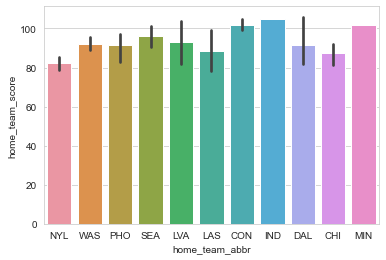

In [89]:
sns.set_style("whitegrid")
sns.barplot(x="home_team_abbr", y="home_team_score", data=home_wins)

Create a bar plot using Seaborn to show the home team win probability within our dataset of home team wins in the WNBA postseason.

<AxesSubplot:xlabel='home_team_winprob', ylabel='home_team_abbr'>

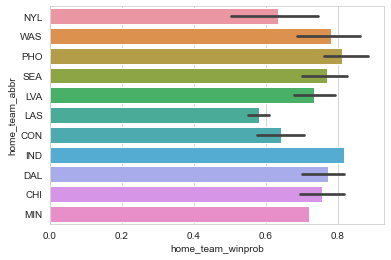

In [122]:
sns.set_style("whitegrid")
sns.barplot(x="home_team_winprob", y="home_team_abbr", data=home_wins)